#Analisis Exploratorio de Datos (EDA)

**Dataset:** "bank_dataset.csv"

**Git**: https://github.com/Nathifer



## Índice
1. [Importación de librerías](#1-importacion-de-librerias)
2. [Carga del dataset](#2-carga-del-dataset)
3. [Descripciones básicas del dataset](#3-descripciones-basicas-del-dataset)
4. [Outliers y faltantes](#4-outliers-y-faltantes)
5. [Características relevantes (Pearson)](#5-caracteristicas-relevantes)
6. [Balance entre clases](#6-balance-entre-clases)
7. [Conclusión](#7-conclusion)

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Importacion de librerias

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz
import sweetviz as sv

#2. Carga del dataset

In [140]:
bank = pd.read_csv('/content/drive/MyDrive/bank_dataset.csv')

#3. Descripciones basicas del dataset

In [141]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [142]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


In [143]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


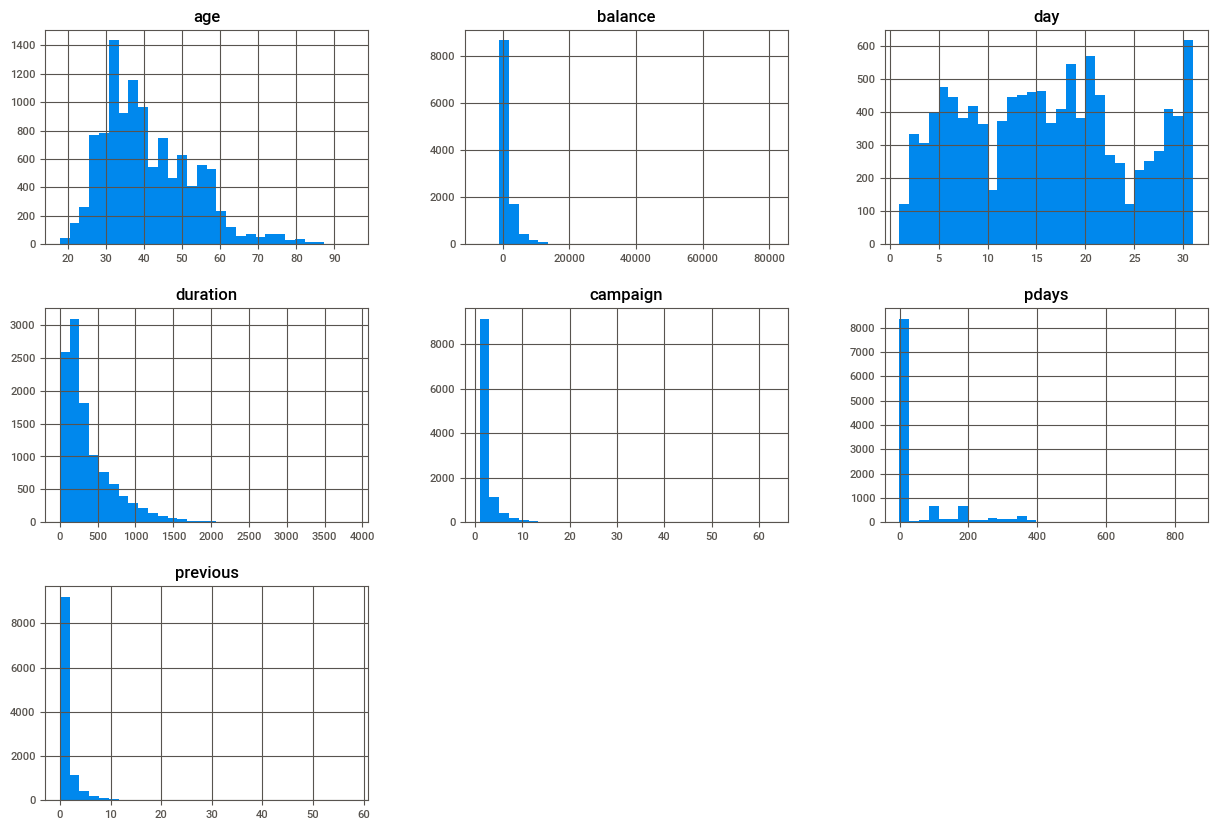

In [144]:
bank.hist(bins=30, figsize=(15, 10))
plt.show()

Debido al desplazamiento  que se observa del eje X en algunos de los histogramas hacemos una comprobacion de los posibles outliers. Por Ejemplo, utilizamos la variable previour para saber cual es el valor maximo y comprobar la posible existencia de valores outliers.

In [145]:
max_previous = bank['previous'].max()
max_previous

58

# Datos Faltantes y Outliers

###Outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

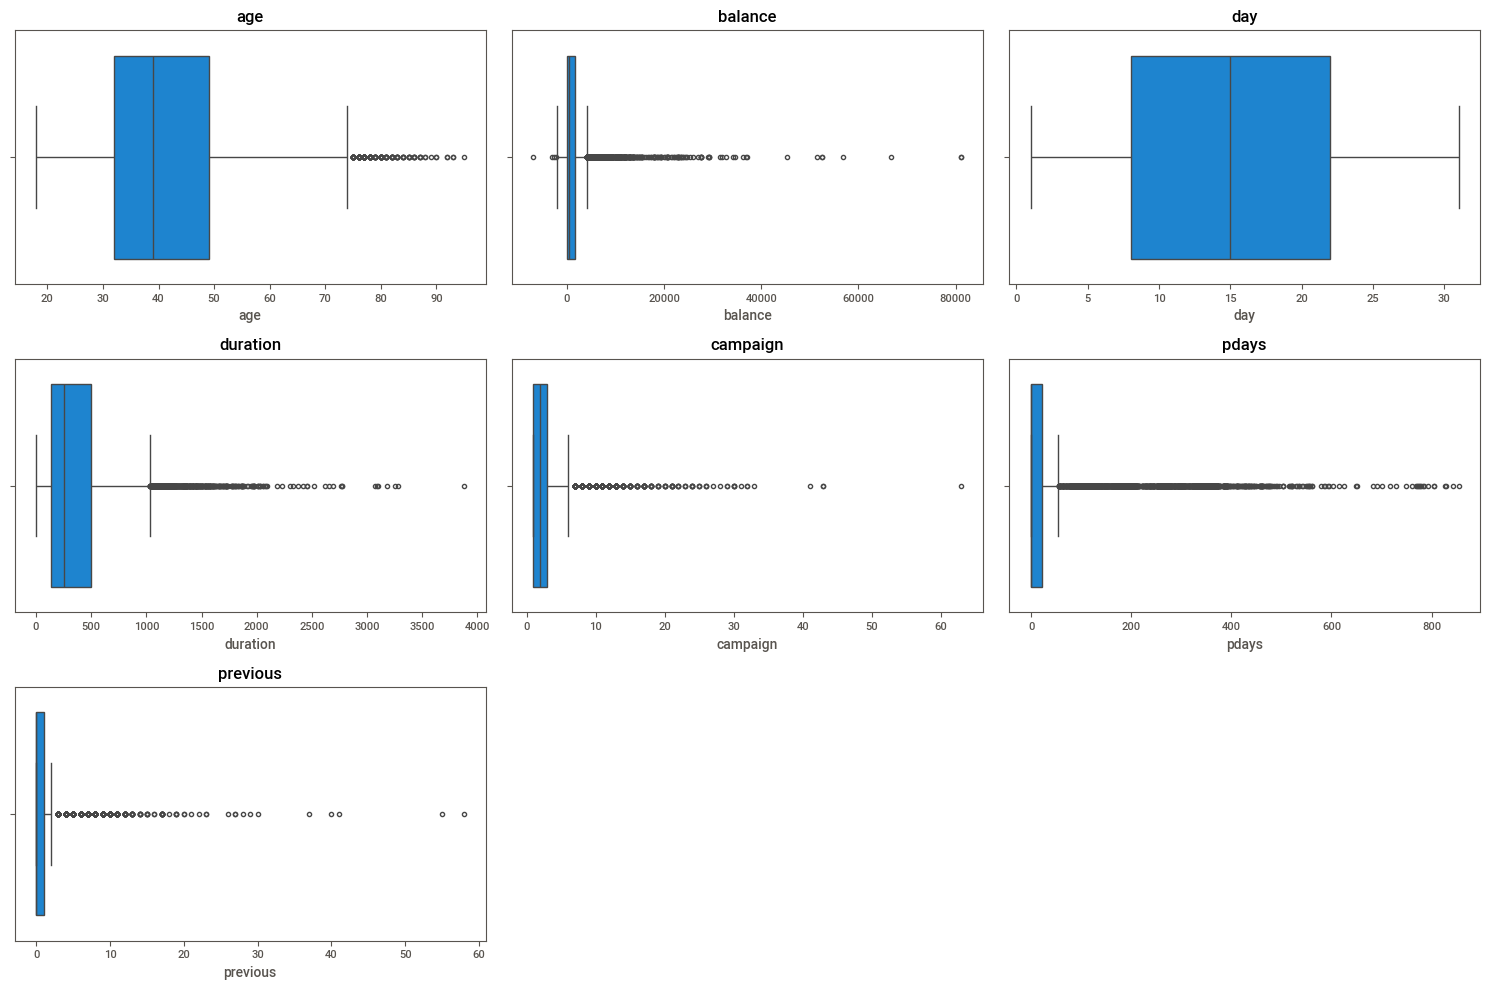

In [146]:
# Seleccionar solo las columnas numéricas
df_numerical = bank.select_dtypes(include=['float64', 'int64'])

# Crear la figura y los ejes (3x3)
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Tamaño ajustable

# Aplanar la matriz de ejes para facilitar la iteración
axes = axes.flatten()

# Crear un boxplot para cada variable numérica en su respectivo subplot
for i, column in enumerate(df_numerical.columns):
    sns.boxplot(x=df_numerical[column], ax=axes[i])
    axes[i].set_title(f'{column}', fontsize=12)

# Ocultar los subplots vacíos si no tienes 9 variables
for j in range(i + 1, 9):
    axes[j].axis('off')  # Ocultar ejes vacíos

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

###Valores faltantes

In [147]:
bank.isnull().sum()

,0
age,10
job,0
marital,5
education,7
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [148]:
# Filtrar filas con valores nulos
filas_con_nulos = bank[bank.isnull().any(axis=1)]
print(filas_con_nulos)

        age           job   marital  education default  balance housing loan  \
1088   53.0    management       NaN  secondary      no     1004      no  yes   
1181    NaN    management   married   tertiary      no      309     yes   no   
1300   37.0    technician   married        NaN      no      549      no   no   
1410    NaN   blue-collar   married    primary      no     4979      no   no   
2943   24.0       student    single        NaN      no      382      no   no   
3719   68.0       retired       NaN  secondary      no     4189      no   no   
4019    NaN      services    single  secondary      no     1934      no   no   
4737   37.0    management    single        NaN      no      102     yes   no   
4854   34.0    management       NaN   tertiary      no        5      no   no   
5680    NaN    technician    single   tertiary      no      720      no   no   
6701   60.0        admin.       NaN    primary      no     -444      no  yes   
6763    NaN    technician    single   te

In [149]:
valores_unicos_marital = bank['marital'].unique()
valores_unicos_marital

array(['married', 'single', 'divorced', nan], dtype=object)

In [150]:
# Filtrar filas donde 'marital' es nulo
filas_con_nulos = bank[bank['marital'].isnull()]

# Imprimir las filas con valores nulos en 'marital'
print(filas_con_nulos)

       age          job marital  education default  balance housing loan  \
1088  53.0   management     NaN  secondary      no     1004      no  yes   
3719  68.0      retired     NaN  secondary      no     4189      no   no   
4854  34.0   management     NaN   tertiary      no        5      no   no   
6701  60.0       admin.     NaN    primary      no     -444      no  yes   
9272  30.0  blue-collar     NaN    primary      no       35     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1088  telephone   22   dec       119         1     -1         0  unknown   
3719  telephone   14   jul       897         2     -1         0  unknown   
4854   cellular   18   aug       370         2     -1         0  unknown   
6701   cellular   16   jul       227         1     -1         0  unknown   
9272   cellular   11   jul       366         2     -1         0  unknown   

     deposit  
1088     yes  
3719     yes  
4854     yes  
6701      no  
9272      n

Se calcula la media y moda para las variables que tiene nulos y poder imputar estos valores faltantes.

In [151]:
# Calcular la media de 'age' para cada combinación de 'job', 'marital', 'education', y 'balance'
age_mean = bank.groupby(['job', 'marital', 'education'])['age'].mean().reset_index(name='mean_age')
print(age_mean)
# Calcular la moda (la categoría más frecuente) de 'marital' para cada combinación
marital_mode = bank.groupby(['job', 'age', 'education'])['marital'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index(name='mode_marital')
print(marital_mode)
# Calcular la moda de 'education' para cada combinación
education_mode = bank.groupby(['job', 'age', 'marital'])['education'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).reset_index(name='mode_education')
print(education_mode)

         job   marital  education   mean_age
0     admin.  divorced    primary  42.500000
1     admin.  divorced  secondary  43.201220
2     admin.  divorced   tertiary  37.000000
3     admin.  divorced    unknown  50.000000
4     admin.   married    primary  49.666667
..       ...       ...        ...        ...
127  unknown   married   tertiary  49.400000
128  unknown   married    unknown  54.071429
129  unknown    single  secondary  33.833333
130  unknown    single   tertiary  38.250000
131  unknown    single    unknown  37.555556

[132 rows x 4 columns]
          job   age  education mode_marital
0      admin.  20.0  secondary       single
1      admin.  21.0  secondary       single
2      admin.  22.0  secondary       single
3      admin.  22.0   tertiary       single
4      admin.  23.0  secondary       single
...       ...   ...        ...          ...
1370  unknown  60.0    unknown      married
1371  unknown  65.0    unknown      married
1372  unknown  67.0   tertiary      marr

Se imputan los valores media y moda calculados anteriormente

In [152]:
# Imputar la media para 'age'
for index, row in bank[bank['age'].isnull()].iterrows():
    mean_age = age_mean.loc[
        (age_mean['job'] == row['job']) &
        (age_mean['marital'] == row['marital']) &
        (age_mean['education'] == row['education']) , 'mean_age'
    ]

    if not mean_age.empty:
        bank.at[index, 'age'] = mean_age.values[0]

# Imputar la moda para 'education'
for index, row in bank[bank['education'].isnull()].iterrows():
    mode_education = education_mode.loc[
        (education_mode['job'] == row['job']) &
        (education_mode['age'] == row['age']) &
        (education_mode['marital'] == row['marital']), 'mode_education'
    ]

    if not mode_education.empty:
        bank.at[index, 'education'] = mode_education.values[0]

# Imputar la moda para 'marital'
for index, row in bank[bank['marital'].isnull()].iterrows():
    mode_marital = marital_mode.loc[
        (marital_mode['job'] == row['job']) &
        (marital_mode['age'] == row['age']) &
        (marital_mode['education'] == row['education']), 'mode_marital'
    ]

    if not mode_marital.empty:
        bank.at[index, 'marital'] = mode_marital.values[0]

In [153]:
# Verificar los valores nulos después de la imputación
print("Valores nulos en 'age' después de imputar:", bank['age'].isnull().sum())
print("Valores nulos en 'marital' después de imputar:", bank['marital'].isnull().sum())
print("Valores nulos en 'education' después de imputar:", bank['education'].isnull().sum())

Valores nulos en 'age' después de imputar: 0
Valores nulos en 'marital' después de imputar: 1
Valores nulos en 'education' después de imputar: 0


In [154]:
valores_unicos_marital = bank['marital'].unique()
valores_unicos_marital

array(['married', 'single', 'divorced', None], dtype=object)

In [155]:
# Filtrar filas donde 'marital' es nulo
filas_con_nulos = bank[bank['marital'].isnull()]

# Imprimir las filas con valores nulos en 'marital'
print(filas_con_nulos)

       age     job marital education default  balance housing loan   contact  \
6701  60.0  admin.    None   primary      no     -444      no  yes  cellular   

      day month  duration  campaign  pdays  previous poutcome deposit  
6701   16   jul       227         1     -1         0  unknown      no  


In [156]:
filtered_marital_mode = marital_mode[
    (marital_mode['job'] == 'admin.') &
    (marital_mode['education'] == 'primary')]

print(filtered_marital_mode)

        job   age education mode_marital
11   admin.  26.0   primary       single
22   admin.  30.0   primary     divorced
32   admin.  34.0   primary     divorced
35   admin.  35.0   primary       single
41   admin.  37.0   primary      married
44   admin.  38.0   primary      married
48   admin.  39.0   primary      married
52   admin.  40.0   primary      married
56   admin.  41.0   primary      married
59   admin.  42.0   primary      married
64   admin.  44.0   primary     divorced
68   admin.  45.0   primary     divorced
72   admin.  46.0   primary     divorced
76   admin.  47.0   primary       single
80   admin.  48.0   primary      married
87   admin.  51.0   primary      married
91   admin.  52.0   primary      married
94   admin.  53.0   primary      married
97   admin.  54.0   primary      married
101  admin.  55.0   primary      married
105  admin.  56.0   primary      married
107  admin.  57.0   primary      married
110  admin.  58.0   primary      married
113  admin.  59.

In [157]:
#Teniendo en cuenta lo anterior se decide imputar el valor como married ya que las caracteristicas mas parecidas por edad, job y primary es ese valor.
bank['marital'].fillna('married', inplace=True)

<ipython-input-157-260d61e8fc46>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank['marital'].fillna('married', inplace=True)


In [158]:
# Verificar los valores nulos después de la imputación
print("Valores nulos en 'marital' después de imputar:", bank['marital'].isnull().sum())

Valores nulos en 'marital' después de imputar: 0


###Valores en variables categoricas

In [159]:
for column in bank.select_dtypes(include=['object']).columns:
    print(bank[column].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6354
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5478
tertiary     3688
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

# Seleccion de caracteristicas (Pearson)

In [160]:
# Correlacion
corr = bank.corr(numeric_only=True)

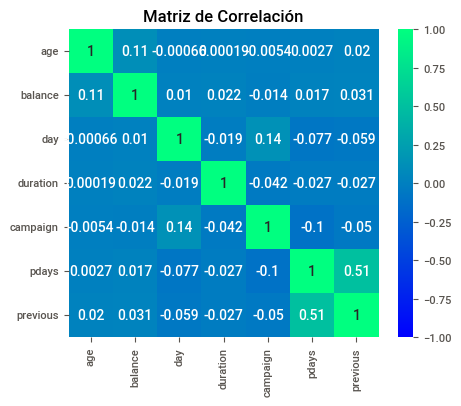

In [161]:
# Visualitzar la matriu de correlació amb un mapa de calor

plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='winter', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()


Se muestra una correlacion positiva de 0.51 entre las variables pdays (número de días que han pasado desde que se contactó al cliente por última vez en una campaña anterior) y previous (número de contactos realizados antes de esta campaña y para este cliente).

Esto podria deberse a que aquellos clientes que han sido contactados en el pasado son menos propensos a ser contactados en campañas recientes, lo que resulta en un aumento de días desde el último contacto.


# 6. Balance entre Clases

Porcentaje de depósitos: 47.38%
Porcentaje de no depósitos: 52.62%


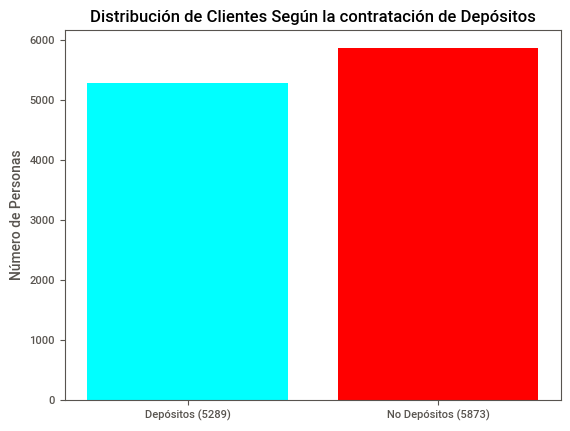

In [165]:
# Contar el número de suscripciones y no suscripciones en la variable 'deposit'
num_depositos = bank[bank['deposit'] == 'yes'].shape[0]
num_no_depositos = bank[bank['deposit'] == 'no'].shape[0]

total = num_depositos + num_no_depositos
percent_depositos = (num_depositos / total) * 100
percent_no_depositos = (num_no_depositos / total) * 100
print(f"Porcentaje de depósitos: {percent_depositos:.2f}%")
print(f"Porcentaje de no depósitos: {percent_no_depositos:.2f}%")

# Gráficas de barras
plt.bar(["Depósitos (%d)" % num_depositos, "No Depósitos (%d)" % num_no_depositos],
        [num_depositos, num_no_depositos],
        color=["cyan", "red"],
        width=0.8)

plt.ylabel("Número de Personas")
plt.title("Distribución de Clientes Según la contratación de Depósitos")
plt.show()

##OverSampler

* No existe mucho desbalanceo entre clases pero se realiza un oversampler de creacion de muestras sinteticas en la clase "Depositos"

In [166]:
from imblearn.over_sampling import RandomOverSampler

# Características (X) y la variable objetivo (y)
X = bank.drop(columns=['deposit'])
y = bank['deposit']

# Inicializar el oversampler
ros = RandomOverSampler(random_state=42)

# Aplicar oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convertir de nuevo a un DataFrame
bank_resampled = pd.DataFrame(X_resampled, columns=X.columns)
bank_resampled['deposit'] = y_resampled

# Verificar el nuevo balance de clases
num_depositos_resampled = bank_resampled[bank_resampled['deposit'] == 'yes'].shape[0]
num_no_depositos_resampled = bank_resampled[bank_resampled['deposit'] == 'no'].shape[0]

print("Número de depósitos después de oversampling:", num_depositos_resampled)
print("Número de no depósitos después de oversampling:", num_no_depositos_resampled)

# Verificar los porcentajes
total_resampled = num_depositos_resampled + num_no_depositos_resampled
percent_depositos_resampled = (num_depositos_resampled / total_resampled) * 100
percent_no_depositos_resampled = (num_no_depositos_resampled / total_resampled) * 100

print(f"Porcentaje de depósitos después de oversampling: {percent_depositos_resampled:.2f}%")
print(f"Porcentaje de no depósitos después de oversampling: {percent_no_depositos_resampled:.2f}%")

Número de depósitos después de oversampling: 5873
Número de no depósitos después de oversampling: 5873
Porcentaje de depósitos después de oversampling: 50.00%
Porcentaje de no depósitos después de oversampling: 50.00%


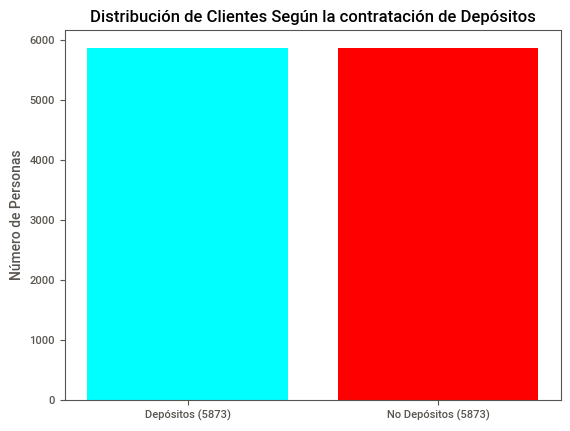

In [168]:
# Gráficas de barras
plt.bar(["Depósitos (%d)" % num_depositos_resampled, "No Depósitos (%d)" % num_no_depositos_resampled],
        [num_depositos_resampled, num_no_depositos_resampled],
        color=["cyan", "red"],
        width=0.8)

plt.ylabel("Número de Personas")
plt.title("Distribución de Clientes Según la contratación de Depósitos")
plt.show()

EDA con Sweetviz

In [163]:
report = sv.analyze(bank)
report.show_html('EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#Conclusion

El análisis exploratorio de datos (EDA) realizado sobre el dataset "bank_dataset.csv" ha permitido una comprensión profunda de las características de los clientes bancarios y su relación con la contratación de depósitos a plazo.

Inicialmente, se realizó una inspección general del dataset, incluyendo la visualización de las primeras filas, la información general de las variables y estadísticas descriptivas. Este análisis inicial permitió identificar posibles valores atípicos en algunas variables numéricas, lo cual se confirmó posteriormente mediante la visualización de boxplots.

Para garantizar la calidad de los datos, se realizó un tratamiento de valores faltantes en las variables 'age', 'marital' y 'education'. Se aplicó la imputación con la media o la moda, según correspondiera, para completar los valores faltantes, asegurando la integridad del dataset para el análisis posterior.

Se procedió a analizar la correlación entre las variables numéricas utilizando un mapa de calor. Este análisis reveló una correlación positiva moderada entre 'pdays' (número de días desde el último contacto) y 'previous' (número de contactos previos). Este hallazgo sugiere que los clientes que han sido contactados en el pasado son menos propensos a ser contactados en campañas recientes, lo que resulta en un aumento de días desde el último contacto.

En cuanto a la variable objetivo 'deposit', se observó un ligero desbalance entre las clases 'deposit' y 'no deposit'. Para abordar este desbalance, se aplicó la técnica de oversampling utilizando RandomOverSampler, creando muestras sintéticas de la clase minoritaria para equilibrar la distribución de las clases y mejorar el rendimiento de los modelos de predicción.

Finalmente, se generó un informe de análisis exploratorio de datos (EDA) utilizando Sweetviz. Este informe interactivo proporciona una visualización detallada de las características del dataset, incluyendo análisis univariados y bivariados, facilitando la comprensión de las relaciones entre las variables y la identificación de patrones relevantes.

En resumen, el EDA realizado ha proporcionado información valiosa sobre los clientes bancarios y su comportamiento en relación con la contratación de depósitos a plazo. Los hallazgos de este análisis, como la correlación entre variables y el desbalance de clases, son fundamentales para la toma de decisiones en estrategias de marketing y la predicción de la probabilidad de contratación de depósitos, contribuyendo a una mejor comprensión del mercado y la optimización de las campañas de marketing.